## import Liberaries

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('data/Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.drop('Booking_ID',axis=1,inplace=True)

In [7]:
#check duplicates
data.duplicated().sum()

10275

In [8]:
data.shape

(36275, 18)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            36260, 36262, 36264, 36265, 36266, 36269, 36270, 36271, 36272,
            36273],
           dtype='int64', length=26000)

In [11]:
data.reset_index(inplace=True)
data.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [12]:
data.drop('index',inplace=True,axis=1)

In [13]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
def column_info(data):
    cols=[]
    dtypes=[]
    n_uniques=[]
    v_uniques=[]
    null_per=[]
    
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        v_uniques.append(data[col].unique())
        n_uniques.append(data[col].nunique())
        null_per.append(data[col].isna().sum()/len(data))
        
    return pd.DataFrame({'column':cols,'dtype':dtypes,'unique values':v_uniques,'n_unique':n_uniques,'null per':null_per})


In [15]:
column_info(data)

,column,dtype,unique values,n_unique,null per
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5,0.0
1,no_of_children,int64,"[0, 2, 1, 3, 10, 9]",6,0.0
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8,0.0
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18,0.0
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0.0
5,required_car_parking_space,int64,"[0, 1]",2,0.0
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7,0.0
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352,0.0
8,arrival_year,int64,"[2017, 2018]",2,0.0
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12,0.0


In [16]:
data[data['no_of_adults']==0]['booking_status'].value_counts()

Not_Canceled    92
Canceled        43
Name: booking_status, dtype: int64

In [17]:
data[data['no_of_adults']==0]['no_of_children'].value_counts()

2    129
3      5
1      1
Name: no_of_children, dtype: int64

In [18]:
#no_of_childern
data[data['no_of_children']==10]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5289,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled


In [19]:
data[data['no_of_children']==9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8180,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.0,0,Not_Canceled
8196,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.5,1,Canceled


In [20]:
data['no_of_children'].value_counts()

0     23422
1      1524
2      1033
3        18
9         2
10        1
Name: no_of_children, dtype: int64

In [21]:
data['no_of_children'].describe()

count    26000.000000
mean         0.141231
std          0.462502
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

In [22]:
data['no_of_children'].replace(10,3,inplace=True)
data['no_of_children'].replace(9,3,inplace=True)

In [23]:
column_info(data)

,column,dtype,unique values,n_unique,null per
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5,0.0
1,no_of_children,int64,"[0, 2, 1, 3]",4,0.0
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8,0.0
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18,0.0
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0.0
5,required_car_parking_space,int64,"[0, 1]",2,0.0
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7,0.0
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352,0.0
8,arrival_year,int64,"[2017, 2018]",2,0.0
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12,0.0


In [24]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

1    3876
2    3089
3    2606
4    1237
5     204
0      75
Name: no_of_week_nights, dtype: int64

In [25]:
for i in range(len(data)):
    if data.loc[i,'no_of_weekend_nights']==0 and data.loc[i,'no_of_week_nights']==0:
        data.loc[i,'no_of_week_nights']=1

In [26]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

1    3951
2    3089
3    2606
4    1237
5     204
Name: no_of_week_nights, dtype: int64

In [27]:
data['lead_time'].describe()

count    26000.000000
mean        66.452846
std         68.606799
min          0.000000
25%         12.000000
50%         44.000000
75%        100.000000
max        443.000000
Name: lead_time, dtype: float64

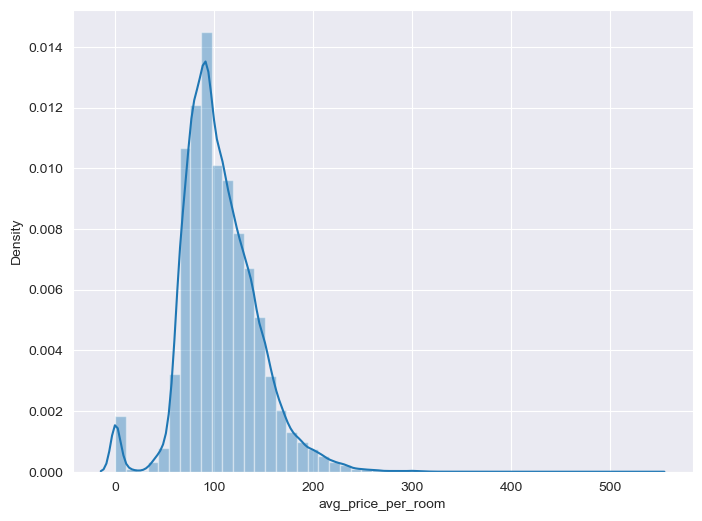

In [28]:
#avg_price_per_room
plt.figure(figsize=(8,6))
sns.distplot(data['avg_price_per_room'])
plt.show()

In [29]:
column_info(data)

,column,dtype,unique values,n_unique,null per
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5,0.0
1,no_of_children,int64,"[0, 2, 1, 3]",4,0.0
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8,0.0
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18,0.0
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4,0.0
5,required_car_parking_space,int64,"[0, 1]",2,0.0
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7,0.0
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352,0.0
8,arrival_year,int64,"[2017, 2018]",2,0.0
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12,0.0


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['booking_status']=le.fit_transform(data['booking_status'])

In [31]:
cat_features=[]
for col in data.columns:
    if data[col].dtype==object:
        cat_features.append(col)
cat_features

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [32]:
import pickle

In [33]:
for col in cat_features:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    
    pickle.dump(le,open("{}_le.pkl".format(col),"wb"))

In [34]:
column_info(data)

,column,dtype,unique values,n_unique,null per
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5,0.0
1,no_of_children,int64,"[0, 2, 1, 3]",4,0.0
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8,0.0
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18,0.0
4,type_of_meal_plan,int32,"[0, 3, 1, 2]",4,0.0
5,required_car_parking_space,int64,"[0, 1]",2,0.0
6,room_type_reserved,int32,"[0, 3, 1, 5, 4, 6, 2]",7,0.0
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352,0.0
8,arrival_year,int64,"[2017, 2018]",2,0.0
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12,0.0


In [35]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [36]:
data.shape

(26000, 18)

In [1]:
#booking status
plt.figure(figsize=(8,6))
plt.pie(x=data['booking_status'].value_counts(),labels=['Not canceled','Canceled'],explode=[0.0,0.2],autopct='%0.2f%%',shadow=True)
plt.show()

NameError: name 'plt' is not defined

In [38]:
X=data.drop('booking_status',axis=1).values
y=data['booking_status'].values
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)
pickle.dump(sd,open("scaler.pkl","wb"))

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced')
model.fit(train_X,train_y)

LogisticRegression(class_weight='balanced')

In [41]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
def evaluate_model(X,y,model):
    y_pred=model.predict(X)
    
    #acc
    acc=accuracy_score(y_pred,y)
    #f1 score
    f1=f1_score(y_pred,y)
    #recall 
    recall=recall_score(y_pred,y)
    #precision 
    precision=precision_score(y_pred,y)
    #
    cm=confusion_matrix(y_pred,y)
    
    tn,fp,fn,tp=cm.ravel()
    specificty=tn/(tn+fp)
    return pd.Series({'Accuracy':acc,"F1 score":f1,'recall':recall,'precesion':precision,'specificty':specificty})

In [42]:
evaluate_model(train_X,train_y,model)

Accuracy      0.772933
F1 score      0.828821
recall        0.897629
precesion     0.769811
specificty    0.575912
dtype: float64

In [43]:
evaluate_model(test_X,test_y,model)

Accuracy      0.766731
F1 score      0.823512
recall        0.893308
precesion     0.763833
specificty    0.569390
dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced',max_depth=10)
model.fit(train_X,train_y)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [45]:
evaluate_model(train_X,train_y,model)

Accuracy      0.859519
F1 score      0.901043
recall        0.906508
precesion     0.895644
specificty    0.746939
dtype: float64

In [46]:
evaluate_model(test_X,test_y,model)


Accuracy      0.848269
F1 score      0.893306
recall        0.895122
precesion     0.891498
specificty    0.733775
dtype: float64

In [47]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))